In [1]:
import numpy as np
import multiprocessing as mp
from tqdm import tqdm

proc_num = 10
print(f"Number of processors: {proc_num}/{mp.cpu_count()}")
stat_cycle_num = 20

Number of processors: 10/12


In [2]:
import sympy as sp
from RabinovichFabrikant import *

sp.init_printing()

system.equations

c:\python\lib\site-packages\qbee\quadratization.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
def get_steps(func):
    total_steps = list()
    for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
        with mp.Pool(proc_num) as pool:
            steps_cur = pool.map(func, range(proc_num))
            total_steps += steps_cur
    return total_steps

def get_steps_alt(func):
    with mp.Pool(mp.cpu_count()) as pool:
        total_steps = list(tqdm(pool.imap_unordered(func, range(proc_num * stat_cycle_num)),
                                total=proc_num * stat_cycle_num))
        return total_steps

def print_statistics(steps):
    print(f"Range: [{np.nanmin(steps)}, {np.nanmax(steps)}]")
    print("Mean: ", np.nanmean(steps))
    print("Median: ", np.nanmedian(steps))
    print("Standard deviation: ", np.nanstd(steps))

### BFS

In [4]:
bfs_steps = get_steps(quad_bfs_stat)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [21:21<00:00, 64.06s/run]


In [5]:
print("BFS steps statistics:")
print_statistics(bfs_steps)

BFS steps statistics:
Range: [40, 369]
Mean:  197.35
Median:  199.0
Standard deviation:  99.36643044811461


### ID-DLS with "Random" heuristics

In [6]:
iddls_random = get_steps(quad_iddls_random)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [20:28<00:00, 61.42s/run]


In [7]:
print("Random ID-DLS steps statistics:")
print_statistics(iddls_random)

Random ID-DFS steps statistics:
Range: [40, 369]
Mean:  224.94
Median:  228.0
Standard deviation:  107.21957097470592


### ID-DLS with "Frequent-first (FF)" heuristics

In [8]:
iddls_frequent_first = get_steps(quad_iddls_frequent_first)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [21:15<00:00, 63.79s/run]


In [9]:
print("Frequent-first ID-DLS from 2 depth - steps statistics:")
print_statistics(iddls_frequent_first)

Frequent-first ID-DFS from 2 depth - steps statistics:
Range: [40, 368]
Mean:  219.52
Median:  221.0
Standard deviation:  97.08470322352538


### ID-DLS with "Free-variables-count (FVC)" heuristics

In [10]:
iddls_free_variables_count = get_steps(quad_iddls_free_variables_count)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [21:21<00:00, 64.10s/run]


In [11]:
print("Free-variables-count ID-DLS steps statistics:")
print_statistics(iddls_free_variables_count)

Free-variables-count ID-DFS steps statistics:
Range: [40, 84]
Mean:  55.985
Median:  52.0
Standard deviation:  13.125348566800046


### ID-DLS with "Auxiliary-equation-degree (AED)" heuristics

In [12]:
iddls_auxiliary_equation_degree = get_steps(quad_iddls_auxiliary_equation_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [20:12<00:00, 60.65s/run]


In [13]:
print("Auxiliary-equation-degree ID-DLS steps statistics:")
print_statistics(iddls_auxiliary_equation_degree)

Auxiliary-equation-degree ID-DFS steps statistics:
Range: [40, 347]
Mean:  201.98
Median:  196.0
Standard deviation:  102.89334089240178


### ID-DLS with "Auxiliary-equation-quadratic-discrepancy (AEQD)" heuristics

In [14]:
iddls_auxiliary_equation_quadratic_discrepancy = get_steps(quad_iddls_auxiliary_equation_quadratic_discrepancy)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [19:27<00:00, 58.37s/run]


In [15]:
print("Auxiliary-equation-quadratic-discrepancy ID-DLS steps statistics:")
print_statistics(iddls_auxiliary_equation_quadratic_discrepancy)

Auxiliary-equation-quadratic-discrepancy ID-DFS steps statistics:
Range: [40, 41]
Mean:  40.415
Median:  40.0
Standard deviation:  0.4927220311697052


### ID-DLS with "Summary-monomial-degree (SMD)" heuristics

In [16]:
iddls_summary_monomial_degree = get_steps(quad_iddls_summary_monomial_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [25:00<00:00, 75.00s/run]


In [17]:
print("Summary-monomial-degree ID-DLS steps statistics:")
print_statistics(iddls_summary_monomial_degree)

Summary-monomial-degree ID-DFS steps statistics:
Range: [40, 276]
Mean:  162.075
Median:  190.0
Standard deviation:  85.41287593214503


In [18]:
def filter_nan(lst):
    return list(filter(lambda s: not np.isnan(s), lst))

Text(0.5, 1.0, 'Methods comparison')

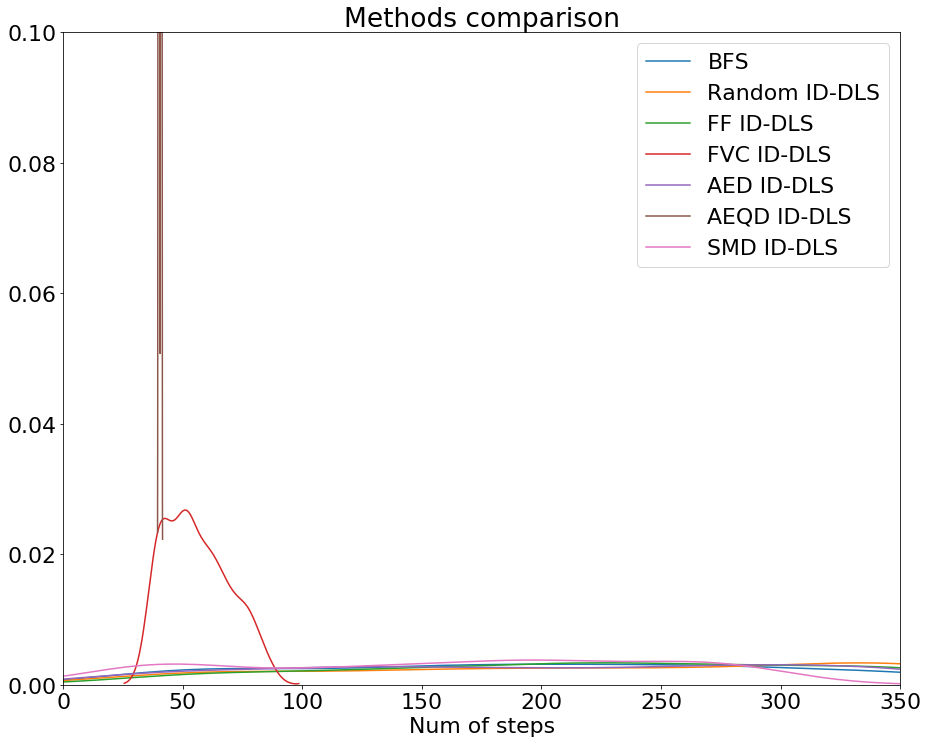

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(filter_nan(bfs_steps), label="BFS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_random), label="Random ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_frequent_first), label="FF ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_free_variables_count), label="FVC ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_auxiliary_equation_degree), label="AED ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_auxiliary_equation_quadratic_discrepancy), label="AEQD ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_summary_monomial_degree), label="SMD ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlim(0, 350)
plt.ylim(0, 0.1)
plt.xlabel("Num of steps")
plt.title("Methods comparison")

Text(0.5, 1.0, 'Methods comparison')

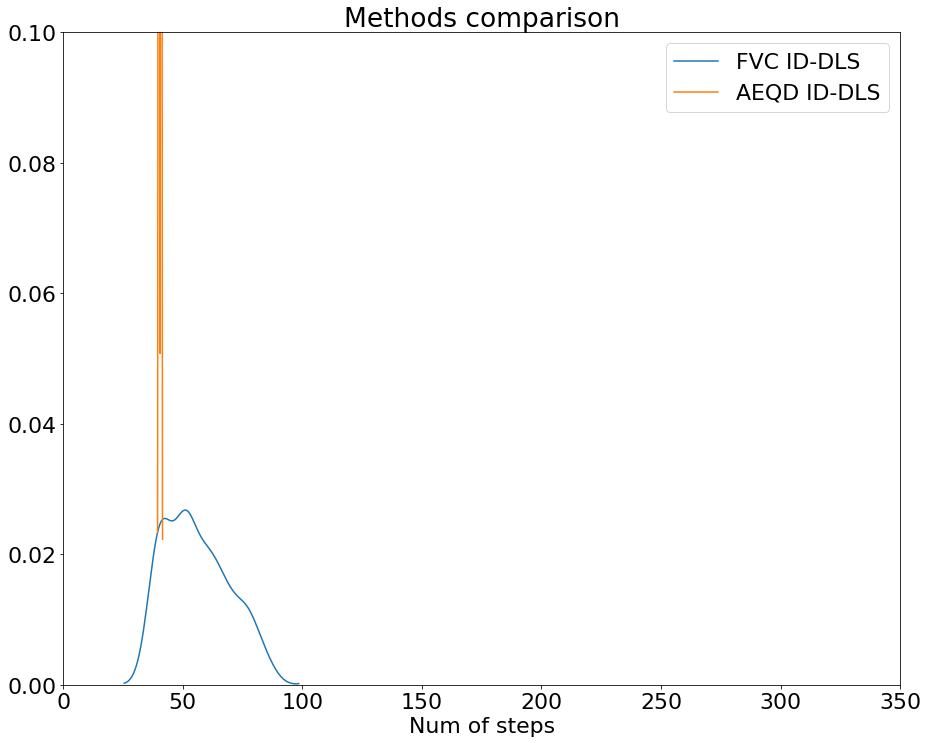

In [23]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(filter_nan(iddls_free_variables_count), label="FVC ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddls_auxiliary_equation_quadratic_discrepancy), label="AEQD ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlim(0, 350)
plt.ylim(0, 0.1)
plt.xlabel("Num of steps")
plt.title("Methods comparison")


Text(0.5, 0, 'Num of steps')

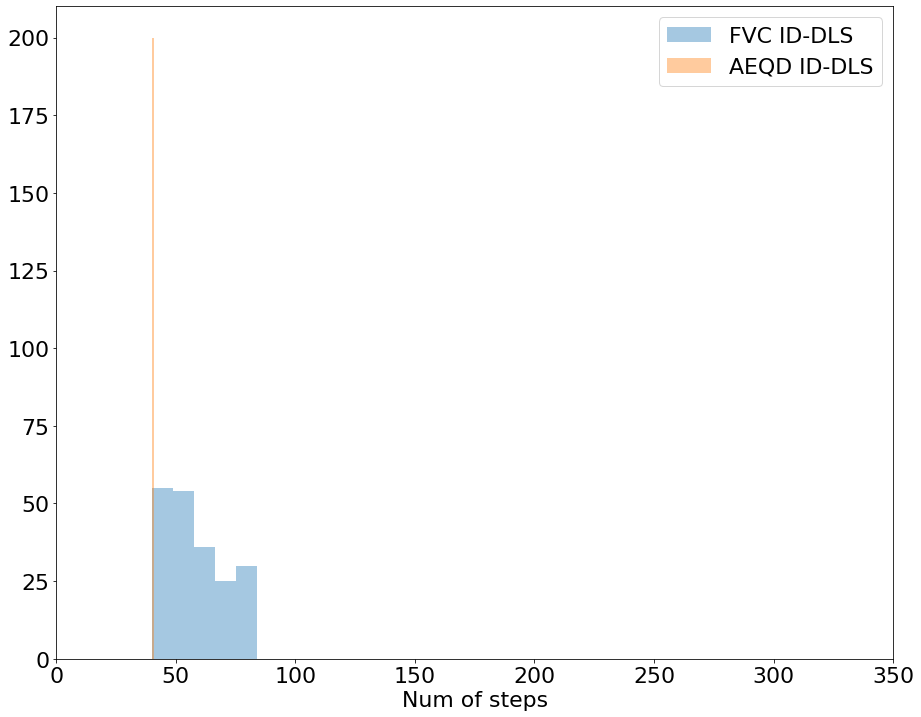

In [24]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(filter_nan(iddls_free_variables_count), label="FVC ID-DLS", kde=False, hist=True)
sns.distplot(filter_nan(iddls_auxiliary_equation_quadratic_discrepancy), label="AEQD ID-DLS",
             kde=False, hist=True, bins=1)
plt.legend()
plt.xlim(0, 350)
plt.xlabel("Num of steps")

In [25]:
import pandas as pd

def flatten(lst):
    return [item for sublist in lst for item in sublist]

steps_df = pd.DataFrame({
    'steps': filter_nan(bfs_steps) +
             filter_nan(iddls_random) +
             filter_nan(iddls_frequent_first) +
             filter_nan(iddls_free_variables_count) +
             filter_nan(iddls_auxiliary_equation_degree) +
             filter_nan(iddls_auxiliary_equation_quadratic_discrepancy) +
             filter_nan(iddls_summary_monomial_degree),
    'method': ["BFS"] * len(filter_nan(bfs_steps)) +
              ["Random"] * len(filter_nan(iddls_random)) +
              ["FF"] * len(filter_nan(iddls_frequent_first)) +
              ["FVC"] * len(filter_nan(iddls_free_variables_count)) +
              ["AED"] * len(filter_nan(iddls_auxiliary_equation_degree)) +
              ["AEQD"] * len(filter_nan(iddls_auxiliary_equation_quadratic_discrepancy)) +
              ["SMD"] * len(filter_nan(iddls_summary_monomial_degree))

})

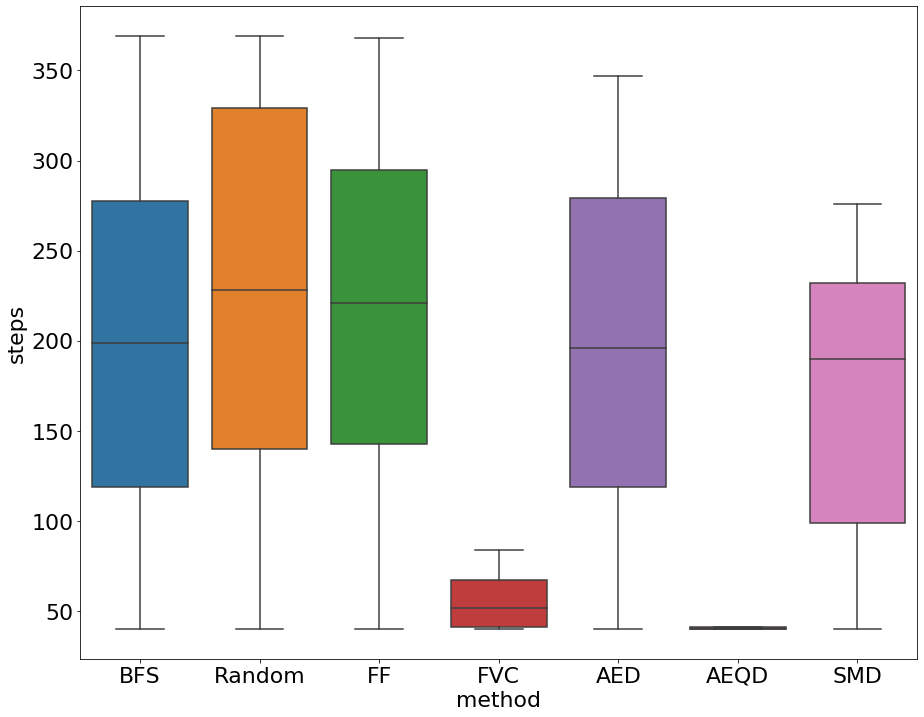

In [26]:
plt.figure(figsize=(15, 12))
sns.boxplot('method', 'steps', data=steps_df)


